In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import time 

In [3]:
events_df= pd.read_csv('event_raw.csv')

In [4]:
events_df.head()

,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk


In [5]:
events_df['created_at_time']=pd.to_datetime(events_df['created_at_time'])

In [6]:
events_df['date']= events_df['created_at_time'].dt.date 
events_df['time']=events_df['created_at_time'].dt.time

In [7]:
events_df.head()

,created_at_time,event,org_id,project_id,user_id,date,time
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,2022-04-20,18:24:30
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,2022-04-25,23:28:23
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,2022-03-22,20:40:20


In [8]:
events_df['org_id'].unique().size

386

In [9]:
events_df['project_id'].unique().size

915

In [10]:
events_df['user_id'].unique().size

543

In [11]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41177 entries, 0 to 41176
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at_time  41177 non-null  datetime64[ns]
 1   event            41177 non-null  object        
 2   org_id           41177 non-null  object        
 3   project_id       41036 non-null  object        
 4   user_id          41177 non-null  object        
 5   date             41177 non-null  object        
 6   time             41177 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.2+ MB


In [12]:
events_df.dropna(axis = 'index',inplace= True)

In [13]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41036 entries, 0 to 41176
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at_time  41036 non-null  datetime64[ns]
 1   event            41036 non-null  object        
 2   org_id           41036 non-null  object        
 3   project_id       41036 non-null  object        
 4   user_id          41036 non-null  object        
 5   date             41036 non-null  object        
 6   time             41036 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.5+ MB


In [14]:
events_df.drop(['created_at_time'],axis=1, inplace= True)

In [15]:
events_df.head()

,event,org_id,project_id,user_id,date,time
0,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,2022-04-20,18:24:30
1,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54
2,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54
3,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,2022-04-25,23:28:23
4,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,2022-03-22,20:40:20


In [16]:
temp_time = pd.Series(events_df['time'])

In [17]:
hour_df = temp_time.apply(lambda x: x.hour)

In [66]:
hour_df

0        18
1        23
2        23
3        23
4        20
         ..
41172     8
41173    10
41174    17
41175    23
41176    23
Name: time, Length: 41036, dtype: int64

In [67]:
hour_df.value_counts()

11    4907
10    4515
12    4021
17    3351
16    3217
18    2856
15    2770
9     2524
14    2216
19    2088
13    1930
8     1826
21    1271
20    1170
7      736
22     565
23     486
0      174
6      130
2       92
1       88
5       75
4       14
3       14
Name: time, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'No. of interactions Vs Time'}, xlabel='time', ylabel='count'>

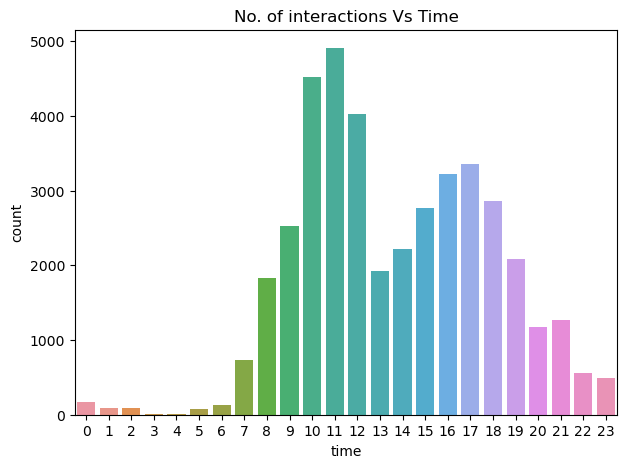

In [19]:
# Interactions Vs Time
plt.figure(figsize=(7,5))
plt.title('No. of interactions Vs Time')
sns.countplot(hour_df)

In [20]:
# finding the most occouring and least occouring event in the data 

In [21]:
event_dir = {
    'add_attendance_success': 1,
    'assigned_people_on_task': 2,
    'attendance_list_accessed': 3,
    'channel_message_sent': 4,
    'comment_create_success': 5,
    'dashboard_view_success': 6,
    'followup_button_clicked': 7,
    'generate_report_success': 8,
    'image_upload_success': 9,
    'indent_create_success': 10,
    'material_profile_material_load': 11,
    'new_material_added': 12,
    'project_creation_request_success': 13,
    'stock_material_updated': 14,
    'task_creation': 15,
    'task_log_create_success': 16,
    'thread_create_success': 17
}



In [22]:
events_df['event_id']=events_df['event'].map(event_dir)

In [23]:
events_df.head()

,event,org_id,project_id,user_id,date,time,event_id
0,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,2022-04-20,18:24:30,13
1,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,16
2,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,15
3,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,2022-04-25,23:28:23,13
4,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,2022-03-22,20:40:20,16


<AxesSubplot:title={'center':'Most Occouring events'}, xlabel='event_id', ylabel='count'>

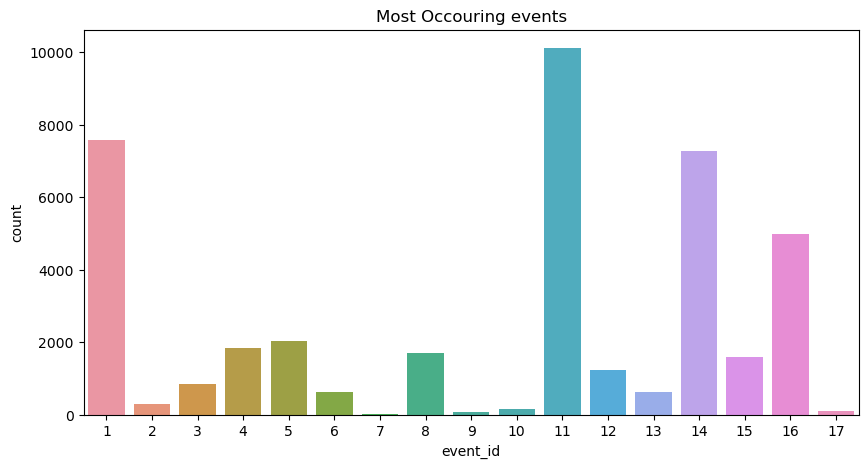

In [24]:
plt.figure(figsize=(10,5))
plt.title('Most Occouring events')
sns.countplot(x='event_id',data=events_df)

In [69]:
events_df['event_id'].value_counts()

11    10113
1      7566
14     7272
16     4989
5      2024
4      1837
8      1692
15     1595
12     1243
3       837
13      618
6       617
2       289
10      158
17       93
9        69
7        24
Name: event_id, dtype: int64

In [25]:
# scatterplot for time vs event

In [26]:
time_event = pd.DataFrame({'time':events_df['time'],'Event':events_df['event_id']})
time_event.head()

,time,Event
0,18:24:30,13
1,23:29:54,16
2,23:29:54,15
3,23:28:23,13
4,20:40:20,16


In [27]:
time_event['time'] = time_event['time'].apply(lambda x: x.hour)

In [28]:
time_event.head()

,time,Event
0,18,13
1,23,16
2,23,15
3,23,13
4,20,16


<Figure size 1000x1000 with 0 Axes>

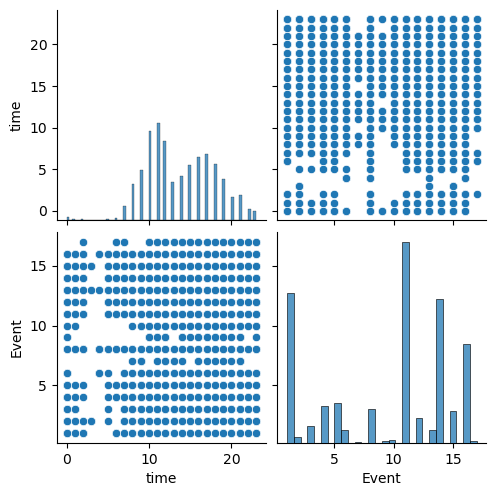

In [29]:
plt.figure(figsize=(10,10))
sns.pairplot(data = time_event)

In [30]:
# for the 20 most active users we find out there behaviour 

In [31]:
active_users = events_df['user_id'].value_counts().reset_index()

In [32]:
active_users.columns = ['user_id','count']
active_users = active_users.sort_values(by='count',ascending=False)
active_users.head()

,user_id,count
0,USR509149973276,9594
1,USR395096428126,2608
2,USR659222931763,2028
3,USR594255074022,1308
4,USR660555701919,1280


In [33]:
top50users = active_users.head(50)

In [34]:
topusers = events_df[events_df['user_id'].isin(top50users['user_id'])]

In [35]:
topusers.head()

,event,org_id,project_id,user_id,date,time,event_id
88,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-11,18:25:46,14
89,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-11,18:26:23,14
90,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-13,11:13:52,14
91,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-13,12:03:11,14
92,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-13,12:03:27,14


<AxesSubplot:xlabel='event_id', ylabel='count'>

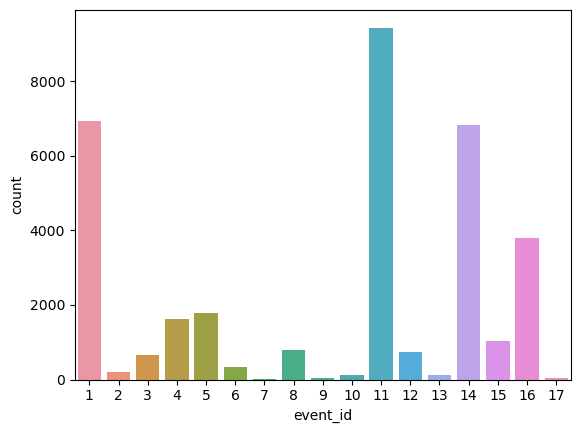

In [36]:
sns.countplot(x='event_id',data= topusers)

In [37]:
restusers = events_df[~events_df['user_id'].isin(topusers['user_id'])]
restusers.head()

,event,org_id,project_id,user_id,date,time,event_id
0,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,2022-04-20,18:24:30,13
1,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,16
2,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,15
3,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,2022-04-25,23:28:23,13
4,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,2022-03-22,20:40:20,16


<AxesSubplot:xlabel='event_id', ylabel='count'>

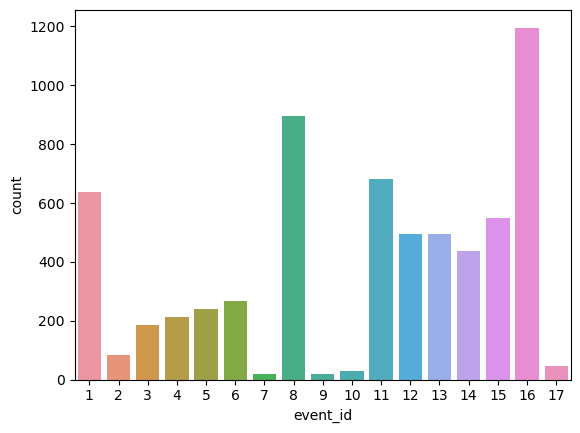

In [38]:
sns.countplot(x='event_id',data = restusers)

In [39]:
topuseractivity = topusers['event_id'].value_counts().reset_index()
topuseractivity.columns= ['event_id','count']
topuseractivity=topuseractivity.sort_values(by='count',ascending =False)

In [40]:
topuseractivity

,event_id,count
0,11,9432
1,1,6930
2,14,6835
3,16,3793
4,5,1783
5,4,1625
6,15,1047
7,8,798
8,12,749
9,3,651


In [41]:
nonuseractivity = restusers['event_id'].value_counts().reset_index()
nonuseractivity.columns= ['event_id','count']
nonuseractivity=nonuseractivity.sort_values(by='count',ascending =False)

In [42]:
nonuseractivity

,event_id,count
0,16,1196
1,8,894
2,11,681
3,1,636
4,15,548
5,13,495
6,12,494
7,14,437
8,6,267
9,5,241


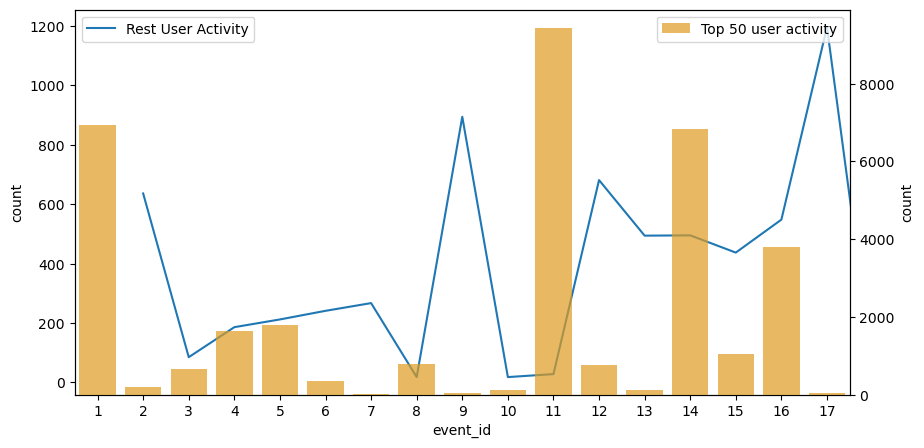

In [70]:

plt.figure(figsize=(10, 5))
ax1 = sns.lineplot(x='event_id', y='count', data=nonuseractivity, label='Rest User Activity')

ax2 = ax1.twinx()

sns.barplot(x='event_id', y='count', data=topuseractivity, ax=ax2, color='orange', alpha=0.7, label='Top 50 user activity')

ax1.legend(loc='upper left') 
ax2.legend(loc='upper right')
plt.show()


In [44]:
events_df['date'] = pd.to_datetime(events_df['date'])
events_df['quarter'] = events_df['date'].dt.to_period('Q')

In [45]:
quarter_order = sorted(events_df['quarter'].unique())

events_df['quarter'] = pd.Categorical(events_df['quarter'],categories=quarter_order, ordered=True)

In [65]:
events_df['quarter'].value_counts()

2022Q2    14230
2022Q3     8519
2022Q1     8039
2022Q4     7394
2023Q1     2854
Name: quarter, dtype: int64

<AxesSubplot:xlabel='quarter', ylabel='count'>

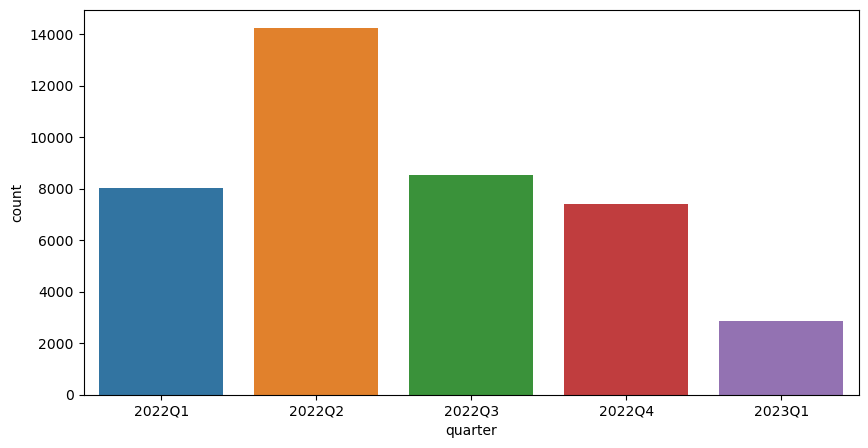

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='quarter',data=events_df)

In [47]:
# use case of top 50 org_id and the rest of  organisations

In [48]:
org = events_df['org_id'].value_counts().reset_index()
org.columns = ['org_id','count']

org.head(10)

,org_id,count
0,ORG546271885436,13318
1,ORG400468153021,9597
2,ORG127673490030,3774
3,ORG456935078790,2028
4,ORG019020816870,1681
5,ORG28pntxq4v8sk,969
6,ORG407679945784,838
7,ORG523955441584,708
8,ORG183381607282,651
9,ORG4s0uwwbypr6d,555


In [49]:
org['count'].head(50).sum()

39268

In [50]:
top50org = events_df[events_df['org_id'].isin(org['org_id'].head(50))]
top50org.head()

,event,org_id,project_id,user_id,date,time,event_id,quarter
29,task_log_create_success,ORG-v31wzk39mtu,PRJ6xq2ief8x4ot,USR-r6ip6u098rf,2022-03-10,05:53:13,16,2022Q1
30,task_log_create_success,ORG-v31wzk39mtu,PRJ6xq2ief8x4ot,USR-r6ip6u098rf,2022-03-10,05:54:06,16,2022Q1
31,task_log_create_success,ORG-v31wzk39mtu,PRJ6xq2ief8x4ot,USR-r6ip6u098rf,2022-03-10,05:54:53,16,2022Q1
32,task_log_create_success,ORG-v31wzk39mtu,PRJ6xq2ief8x4ot,USR-r6ip6u098rf,2022-03-10,05:55:22,16,2022Q1
33,task_log_create_success,ORG-v31wzk39mtu,PRJ6xq2ief8x4ot,USR-r6ip6u098rf,2022-03-10,05:55:48,16,2022Q1


In [51]:
restorg= events_df[~events_df['org_id'].isin(org['org_id'].head(50))]
restorg.head()

,event,org_id,project_id,user_id,date,time,event_id,quarter
0,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,2022-04-20,18:24:30,13,2022Q2
1,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,16,2022Q2
2,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,15,2022Q2
3,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,2022-04-25,23:28:23,13,2022Q2
4,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,2022-03-22,20:40:20,16,2022Q1


Text(0.5, 1.0, 'Rest 336 Org_id')

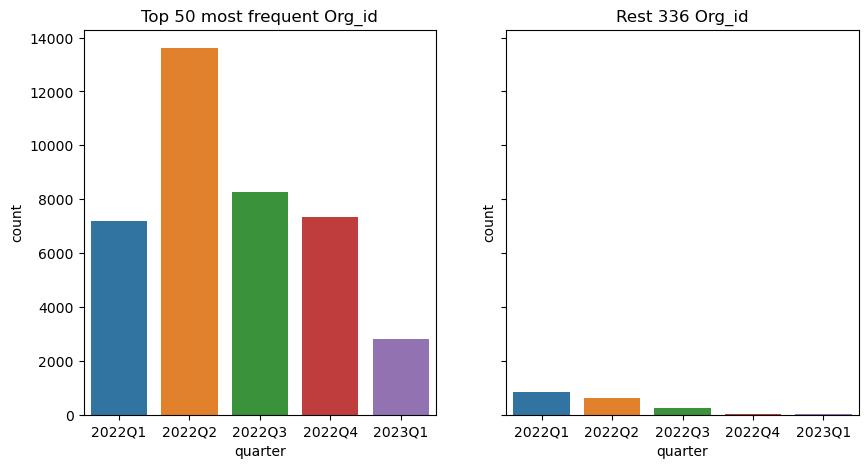

In [52]:
fig,axes = plt.subplots(1,2,figsize=(10,5),sharey=True)

sns.countplot(ax=axes[0],x='quarter',data=top50org)
axes[0].set_title('Top 50 most frequent Org_id')

sns.countplot(ax=axes[1],x='quarter',data=restorg)
axes[1].set_title('Rest 336 Org_id')

In [53]:
top50orgevent = top50org['event_id'].value_counts().reset_index()
top50orgevent.columns=['event_id','count']
top50orgevent.head(10)

,event_id,count
0,11,10023
1,1,7468
2,14,7214
3,16,4712
4,5,2003
5,4,1820
6,15,1373
7,8,1334
8,12,1084
9,3,789


In [54]:
restorgevent=restorg['event_id'].value_counts().reset_index()
restorgevent.columns = ['event_id','count']
restorgevent.head(10)

,event_id,count
0,13,373
1,8,358
2,16,277
3,15,222
4,12,159
5,1,98
6,11,90
7,14,58
8,3,48
9,5,21


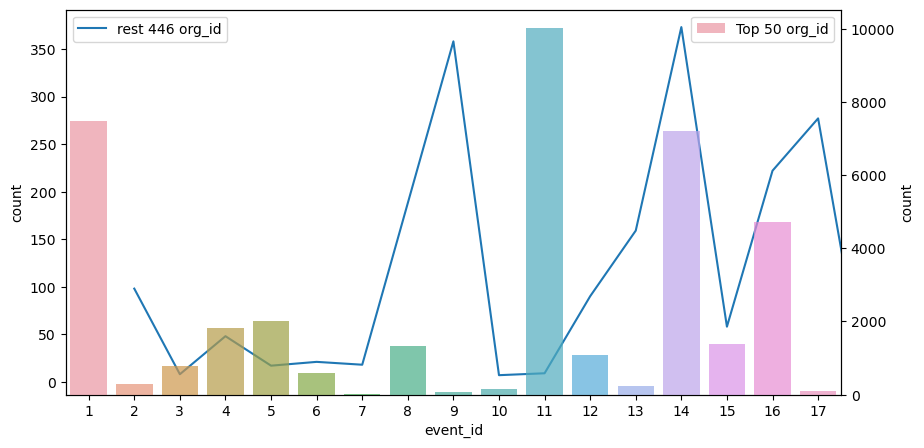

In [55]:
plt.figure(figsize=(10,5))
ax1= sns.lineplot(x='event_id',y='count',data=restorgevent,label='rest 446 org_id')

ax2=ax1.twinx()

sns.barplot(x='event_id',y='count',data = top50orgevent,alpha=0.7,label='Top 50 org_id')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [56]:
# doing the same for differnet project_ids

In [57]:
proj_ids=events_df['project_id'].value_counts().reset_index()
proj_ids.columns=['project_id','count']
proj_ids= proj_ids.sort_values(by='count',ascending=False)
proj_ids.head(10)

,project_id,count
0,PRJ256203650640,12820
1,PRJppirvslunbh9,1779
2,PRJ63dg0jj0k-vo,1481
3,PRJ8p2m3wyqmzs7,1348
4,PRJ355445863893,1280
5,PRJ236274665952,1227
6,PRJ924458474360,1148
7,PRJ060799956494,1062
8,PRJxgi6rhgey7i1,984
9,PRJ907457431360,627


In [58]:
top50proj=events_df[events_df['project_id'].isin(proj_ids['project_id'].head(50))]
top50proj.head()

,event,org_id,project_id,user_id,date,time,event_id,quarter
87,task_creation,ORG008455263549,PRJ113905173253,USR017000020981,2022-02-05,11:25:19,15,2022Q1
88,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-11,18:25:46,14,2022Q3
89,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-11,18:26:23,14,2022Q3
90,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-13,11:13:52,14,2022Q3
91,stock_material_updated,ORG008455263549,PRJ113905173253,USRk2jbsvl2yrex,2022-08-13,12:03:11,14,2022Q3


In [59]:
restproj = events_df[~events_df['project_id'].isin(proj_ids['project_id'].head(50))]
restproj.head()

,event,org_id,project_id,user_id,date,time,event_id,quarter
0,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,2022-04-20,18:24:30,13,2022Q2
1,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,16,2022Q2
2,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,2022-04-25,23:29:54,15,2022Q2
3,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,2022-04-25,23:28:23,13,2022Q2
4,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,2022-03-22,20:40:20,16,2022Q1


Text(0.5, 1.0, 'Rest 336 Org_id')

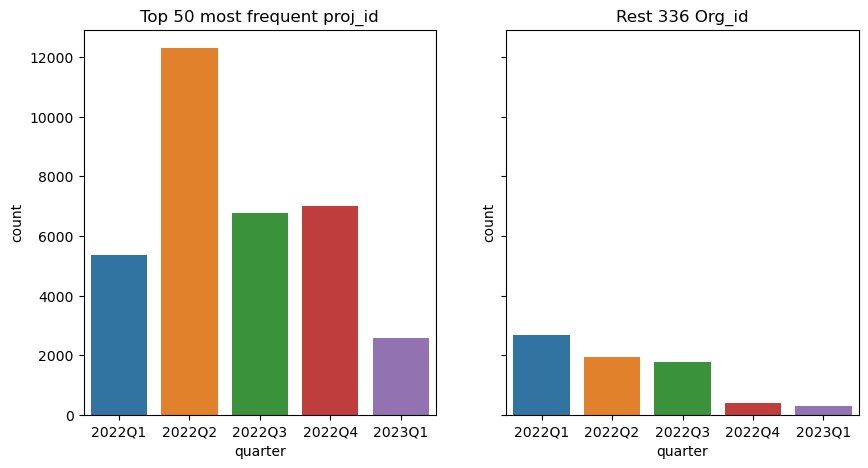

In [60]:
fig,axes = plt.subplots(1,2,figsize=(10,5),sharey=True)

sns.countplot(ax=axes[0],x='quarter',data=top50proj)
axes[0].set_title('Top 50 most frequent proj_id')

sns.countplot(ax=axes[1],x='quarter',data=restproj)
axes[1].set_title('Rest 336 Org_id')

In [61]:
top50projevents=top50proj['event_id'].value_counts().reset_index()
top50projevents.columns= ['event_id','count']
top50projevents.head()

,event_id,count
0,11,9453
1,1,6850
2,14,6785
3,16,3473
4,5,1730


In [62]:
restprojevents=restproj['event_id'].value_counts().reset_index()
restprojevents.columns = ['event_id','count']
restprojevents.head()

,event_id,count
0,16,1516
1,15,810
2,1,716
3,8,710
4,11,660


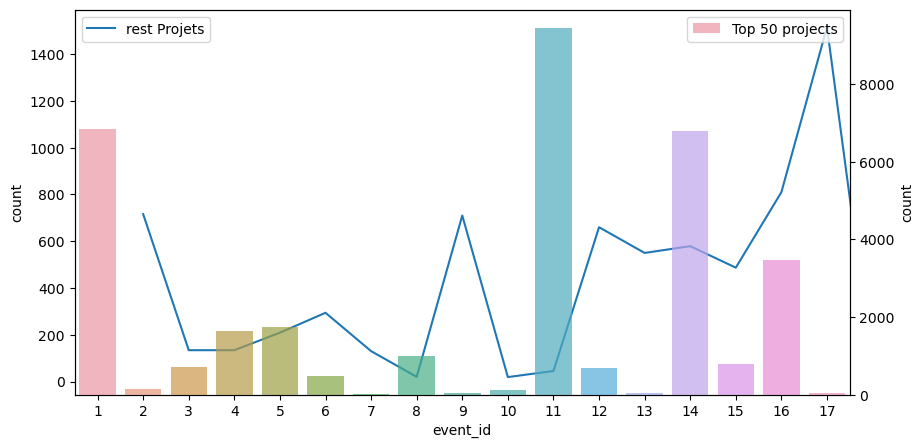

In [64]:
plt.figure(figsize=(10,5))
ax1= sns.lineplot(x='event_id',y='count',data=restprojevents,label='rest Projets')

ax2=ax1.twinx()

sns.barplot(x='event_id',y='count',data = top50projevents,alpha=0.7,label='Top 50 projects')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()